## Analysing stocks: NVIDIA and AMD

In [2]:
# imports

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from datetime import datetime
import openpyxl

In [3]:
def get_data(ticker, period, interval, method='Close'):
    data = yf.download(ticker, period=period, interval=interval)[method]
    data = data.reset_index()
    return data

In [72]:
yf.Ticker('XLC').info

{'longBusinessSummary': 'Normally, the fund generally invests substantially all, but at least 95%, of its total assets in the securities comprising the index. The index includes companies that have been identified as Communication Services companies by the GICS®, including securities of companies from the following industries: diversified telecommunication services; wireless telecommunication services; media; entertainment; and interactive media & services. The fund is non-diversified.',
 'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 81.62,
 'open': 82.25,
 'dayLow': 81.6,
 'dayHigh': 82.25,
 'regularMarketPreviousClose': 81.62,
 'regularMarketOpen': 82.25,
 'regularMarketDayLow': 81.6,
 'regularMarketDayHigh': 82.25,
 'trailingPE': 30.871544,
 'volume': 2264192,
 'regularMarketVolume': 2264192,
 'averageVolume': 6240190,
 'averageVolume10days': 6495260,
 'averageDailyVolume10Day': 6495260,
 'bid': 81.7,
 'ask': 81.72,
 'bidSize': 1200,
 'askSize': 1200,
 'yield': 0.0075,
 'total

In [15]:
ticker_NVD_AMD = ['NVDA', 'AMD']
DATA_NVD_AMD = get_data(ticker_NVD_AMD, '1y', '1h')
DATA_NVD_AMD

[*********************100%%**********************]  2 of 2 completed


Ticker,Datetime,AMD,NVDA
0,2023-03-07 13:30:00-05:00,82.380096,234.234695
1,2023-03-07 14:30:00-05:00,81.653999,233.199997
2,2023-03-07 15:30:00-05:00,82.120003,232.910004
3,2023-03-08 09:30:00-05:00,84.610001,238.586105
4,2023-03-08 10:30:00-05:00,85.290001,238.279999
...,...,...,...
1752,2024-03-07 09:30:00-05:00,209.311996,915.527527
1753,2024-03-07 10:30:00-05:00,211.714005,921.438110
1754,2024-03-07 11:30:00-05:00,211.949997,917.090027
1755,2024-03-07 12:30:00-05:00,211.229996,918.711792


In [3]:
# Correlation test

corr_matrix = DATA_NVD_AMD.corr()['AMD']
corr_matrix

Ticker
Datetime    0.797845
AMD         1.000000
NVDA        0.907734
Name: AMD, dtype: float64

In [4]:
# Calculate ratio

# Normalizing the data
normalizing_value = 83.730003/240.239594
normalizing_value

DATA_NVD_AMD['NVDA_NORM'] = DATA_NVD_AMD['NVDA'].multiply(normalizing_value).round(4)
print(DATA_NVD_AMD.head(10))

# Ratio

DATA_NVD_AMD['RATIO'] = ((DATA_NVD_AMD['NVDA_NORM'] - DATA_NVD_AMD['AMD'])/(DATA_NVD_AMD['NVDA_NORM'] + DATA_NVD_AMD['AMD'])).multiply(100).round(3)
print(DATA_NVD_AMD.head(10))

Ticker                  Datetime        AMD        NVDA  NVDA_NORM
0      2023-03-07 11:30:00-05:00  83.730003  240.239594    83.7300
1      2023-03-07 12:30:00-05:00  83.740097  238.169998    83.0087
2      2023-03-07 13:30:00-05:00  82.380096  234.234695    81.6371
3      2023-03-07 14:30:00-05:00  81.653999  233.199997    81.2765
4      2023-03-07 15:30:00-05:00  82.120003  232.910004    81.1754
5      2023-03-08 09:30:00-05:00  84.610001  238.586105    83.1537
6      2023-03-08 10:30:00-05:00  85.290001  238.279999    83.0470
7      2023-03-08 11:30:00-05:00  84.730003  238.456604    83.1086
8      2023-03-08 12:30:00-05:00  84.245003  238.639999    83.1725
9      2023-03-08 13:30:00-05:00  85.119003  239.780106    83.5699
Ticker                  Datetime        AMD        NVDA  NVDA_NORM  RATIO
0      2023-03-07 11:30:00-05:00  83.730003  240.239594    83.7300 -0.000
1      2023-03-07 12:30:00-05:00  83.740097  238.169998    83.0087 -0.439
2      2023-03-07 13:30:00-05:00  82.3800

In [5]:
# Datetime normalization

DATA_NVD_AMD['Date_time'] = DATA_NVD_AMD['Datetime'] + pd.Timedelta(hours=5)
DATA_NVD_AMD = DATA_NVD_AMD.drop(['Datetime'], axis=1)
DATA_NVD_AMD['Date_time'] = DATA_NVD_AMD['Date_time'].dt.tz_localize(None)
DATA_NVD_AMD = DATA_NVD_AMD[['Date_time', 'AMD', 'NVDA', 'NVDA_NORM', 'RATIO']]

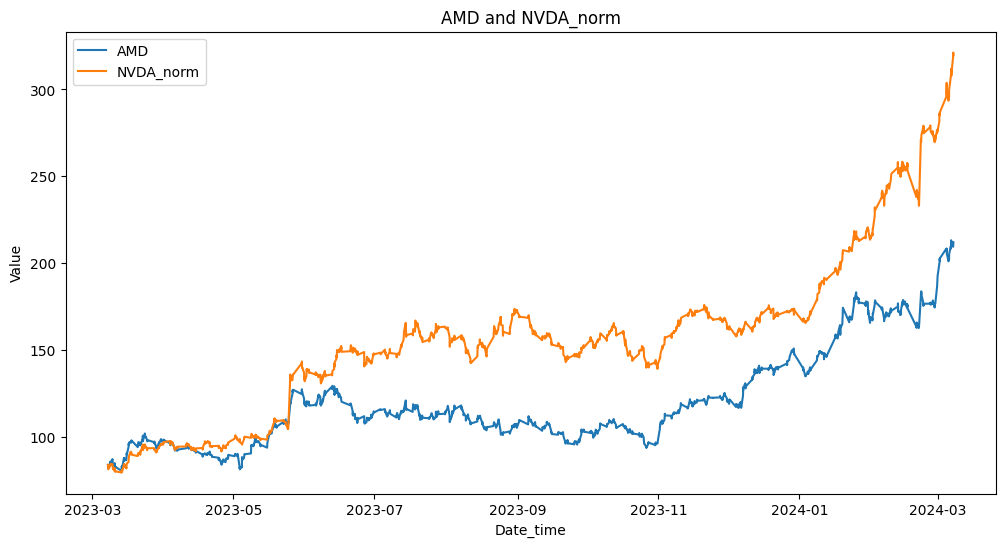

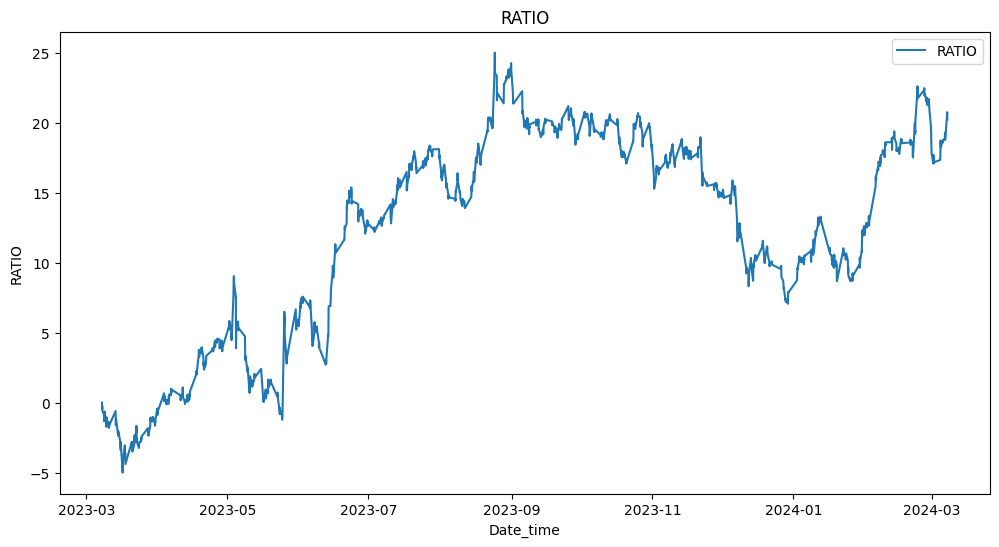

In [14]:
plt.figure(figsize=(12, 6))  # Set the figure size to 12 inches wide and 6 inches tall
plt.plot(DATA_NVD_AMD['Date_time'], DATA_NVD_AMD['AMD'], label='AMD')
plt.plot(DATA_NVD_AMD['Date_time'], DATA_NVD_AMD['NVDA_NORM'], label='NVDA_norm')
plt.xlabel('Date_time')
plt.ylabel('Value')
plt.title('AMD and NVDA_norm')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))  # Set the figure size to 12 inches wide and 6 inches tall
plt.plot(DATA_NVD_AMD['Date_time'], DATA_NVD_AMD['RATIO'], label='RATIO')
plt.xlabel('Date_time')
plt.ylabel('RATIO')
plt.title('RATIO')
plt.legend()
plt.show()


In [7]:
# Save as Excel file

reader_DJ_N_values = pd.read_excel('Project_example.xlsx', sheet_name='DATA')
writer = pd.ExcelWriter('Project_example.xlsx', engine='openpyxl', mode='a', if_sheet_exists='overlay')

DATA_NVD_AMD.to_excel(writer, sheet_name='DATA', index=False, header=False, startrow=len(reader_DJ_N_values))

writer.close()

## Analysing stocks: Tesco and Sainsbury

In [9]:
ticker_TSC_SAINS= ['TSCO.L', 'SBRY.L']
DATA_TSC_SAINS = yf.download(ticker_TSC_SAINS, period='1y', interval='1h')['Close']
DATA_TSC_SAINS = DATA_TSC_SAINS.reset_index()
DATA_TSC_SAINS

[*********************100%%**********************]  2 of 2 completed


Ticker,Datetime,SBRY.L,TSCO.L
0,2023-03-08 08:00:00+00:00,259.960999,257.799988
1,2023-03-08 09:00:00+00:00,259.912994,257.600006
2,2023-03-08 10:00:00+00:00,260.500000,257.899994
3,2023-03-08 11:00:00+00:00,260.799988,258.079987
4,2023-03-08 12:00:00+00:00,260.700012,258.600006
...,...,...,...
2262,2024-03-07 12:00:00+00:00,250.800003,282.600006
2263,2024-03-07 13:00:00+00:00,252.899994,283.299988
2264,2024-03-07 14:00:00+00:00,253.600006,283.899994
2265,2024-03-07 15:00:00+00:00,253.066299,284.200012


In [11]:
# Correlation test

corr_matrix_2 = DATA_TSC_SAINS.corr()['SBRY.L']
corr_matrix_2

Ticker
Datetime    0.003020
SBRY.L      1.000000
TSCO.L      0.442683
Name: SBRY.L, dtype: float64

-----

In [ ]:
ticks_technology = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NVDA', 'AMD', 'INTC', 'CSCO']
ticks_entertainment = ['DIS', 'NFLX', 'ROKU', 'SPOT', 'LYV', 'FOXA', 'DISCA']
ticks_biotech = ['IBB', 'XBI', 'ARKG', 'LABU', 'IDNA', 'GNOM', 'SBIO', 'HRTS']

In [45]:
ticks = ["DPZ", "AAPL", "GOOG", "AMD", "GME", "SPY", "NFLX", "BA", "WMT", "GS", "XOM", "NKE", "META", "BRK-B", "MSFT"]
# correlação entre período médio do par -> pares de 15 dias, pode ter uma média de 200 posições (pontos)
D = get_data(ticks, '2y', '1h') # timeframes pequenas podem ser consideradas ruído
print(D.shape)
D.tail()

[*********************100%%**********************]  17 of 17 completed

3 Failed downloads:
['FB', 'TWTR', 'FEYE']: Exception('%ticker%: No data found, symbol may be delisted')


(3510, 18)


Ticker,index,AAPL,AMD,BA,BRK-B,DPZ,FB,FEYE,GME,GOOG,GS,MSFT,NFLX,NKE,SPY,TWTR,WMT,XOM
3505,2024-03-20 15:30:00-04:00,178.660004,179.740005,187.789993,416.070007,451.820007,NaN,NaN,13.5100,149.679993,396.470001,425.170013,627.760010,100.260002,520.419983,NaN,61.250000,112.980003
3506,2024-03-21 09:30:00-04:00,175.021805,179.658295,189.914001,417.250000,454.010010,NaN,NaN,13.7368,149.960007,410.750000,428.000000,629.320007,101.189903,523.750000,NaN,61.419998,113.809998
3507,2024-03-21 10:30:00-04:00,172.821304,180.709900,188.330002,416.575012,454.274994,NaN,NaN,13.8599,148.750000,410.369995,428.000000,628.173706,101.110001,523.400024,NaN,61.520000,113.519997
3508,2024-03-21 11:30:00-04:00,172.565002,181.456100,188.419098,415.545013,455.651489,NaN,NaN,13.9500,148.919998,411.200012,430.140015,628.049988,101.650002,524.010010,NaN,61.535000,113.770103
3509,2024-03-21 12:30:00-04:00,172.360001,181.479904,187.979996,415.200012,455.130005,NaN,NaN,13.8650,148.455002,412.649994,429.445007,627.875000,101.680000,523.539978,NaN,61.517502,113.584999


In [88]:
# Drop NaN columns
D.dropna(axis=1, how='all', inplace=True)
print(D.shape)
D.head(20)

(3510, 15)


Ticker,index,AAPL,AMD,BA,BRK-B,DPZ,GME,GOOG,GS,MSFT,NFLX,NKE,SPY,WMT,XOM
0,2022-03-21 12:30:00-04:00,163.685501,113.589996,184.149994,348.790009,397.760010,23.725000,134.683502,338.630005,295.390015,370.204987,128.850006,441.303101,48.013332,81.910004
1,2022-03-21 13:30:00-04:00,164.679993,115.250000,185.850006,349.190002,401.470001,23.559999,135.829010,339.848999,297.535004,373.589996,130.248901,443.489990,47.983334,82.074997
2,2022-03-21 14:30:00-04:00,164.690002,115.129997,186.240005,349.565002,399.855011,23.232500,135.808502,339.010010,297.410004,371.674988,129.690002,443.499908,48.016666,82.500000
3,2022-03-21 15:30:00-04:00,165.380005,115.940002,185.910004,349.679993,400.190002,23.535000,136.475494,339.029999,299.190002,374.589996,130.100006,444.429993,48.076664,82.199997
4,2022-03-22 09:30:00-04:00,168.024994,116.879997,189.759995,353.934998,397.459991,25.410000,139.632385,344.524994,302.830505,379.540009,135.500000,448.570007,47.796665,81.139999
5,2022-03-22 10:30:00-04:00,168.809998,117.525002,190.899994,353.589996,398.029999,26.275000,141.435608,343.010010,304.829987,385.570007,135.645004,449.399994,47.826664,81.065002
6,2022-03-22 11:30:00-04:00,168.339996,114.580002,190.910004,352.730011,396.265015,26.940001,140.134491,341.805298,303.079987,381.774994,134.309998,448.109985,47.933334,81.330002
7,2022-03-22 12:30:00-04:00,168.750000,114.379997,192.600006,351.035004,395.839996,29.631075,140.243011,342.540009,302.609985,383.880005,134.255005,449.015503,47.940002,81.760002
8,2022-03-22 13:30:00-04:00,168.622101,114.550003,191.770004,349.350006,395.769989,30.904350,140.029007,342.790009,302.730011,383.250000,133.539993,448.584991,47.889999,81.720001
9,2022-03-22 14:30:00-04:00,168.854996,114.540001,190.610001,349.429993,394.809906,29.825001,140.408752,342.410004,303.420013,384.859985,133.884995,449.029999,47.913334,81.684998


In [87]:
D['index'].dt.date.value_counts()

index
2023-03-22    7
2023-07-12    7
2023-07-31    7
2023-07-28    7
2023-07-27    7
             ..
2022-03-21    4
2024-03-21    4
2023-11-24    3
2023-07-03    3
2022-11-25    3
Name: count, Length: 504, dtype: int64

In [47]:
corr_matrix = D.iloc[:, 1:].corr()
corr_matrix

Ticker,AAPL,AMD,BA,BRK-B,DPZ,GME,GOOG,GS,MSFT,NFLX,NKE,SPY,WMT,XOM
Ticker,,,,,,,,,,,,,,
AAPL,1.000000,0.720831,0.659350,0.748202,0.373636,-0.353109,0.829818,0.273171,0.872274,0.746167,-0.085559,0.813598,0.685527,0.092472
AMD,0.720831,1.000000,0.457145,0.854106,0.618070,-0.412142,0.816419,0.510075,0.928615,0.821490,-0.120780,0.935587,0.700450,0.018248
BA,0.659350,0.457145,1.000000,0.632379,0.157922,-0.562149,0.395524,0.514313,0.584526,0.740932,0.229995,0.598594,0.624129,0.507539
BRK-B,0.748202,0.854106,0.632379,1.000000,0.555186,-0.556240,0.803509,0.538493,0.894811,0.899088,-0.058789,0.946410,0.903403,0.261206
DPZ,0.373636,0.618070,0.157922,0.555186,1.000000,-0.008420,0.620361,0.478210,0.546754,0.439052,-0.134170,0.672312,0.381514,-0.218546
GME,-0.353109,-0.412142,-0.562149,-0.556240,-0.008420,1.000000,-0.265071,-0.353292,-0.530594,-0.671325,0.291542,-0.414744,-0.634625,-0.633133
GOOG,0.829818,0.816419,0.395524,0.803509,0.620361,-0.265071,1.000000,0.194280,0.884021,0.677808,-0.174204,0.857026,0.646041,-0.133626
GS,0.273171,0.510075,0.514313,0.538493,0.478210,-0.353292,0.194280,1.000000,0.417985,0.608524,0.059011,0.584487,0.504301,0.361382
MSFT,0.872274,0.928615,0.584526,0.894811,0.546754,-0.530594,0.884021,0.417985,1.000000,0.879506,-0.173669,0.938519,0.793099,0.113457


<Axes: xlabel='Ticker', ylabel='Ticker'>

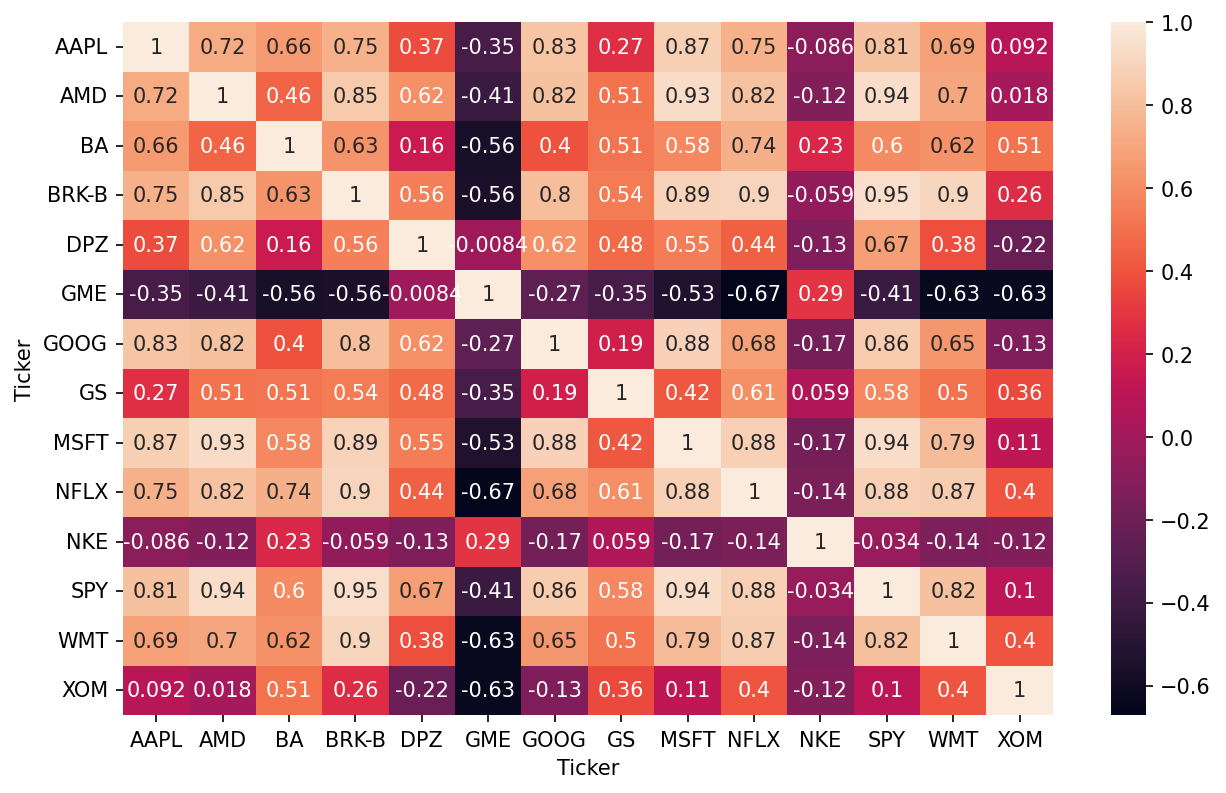

In [74]:
import seaborn as sns
from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=150)
sns.heatmap(corr_matrix, annot=True)

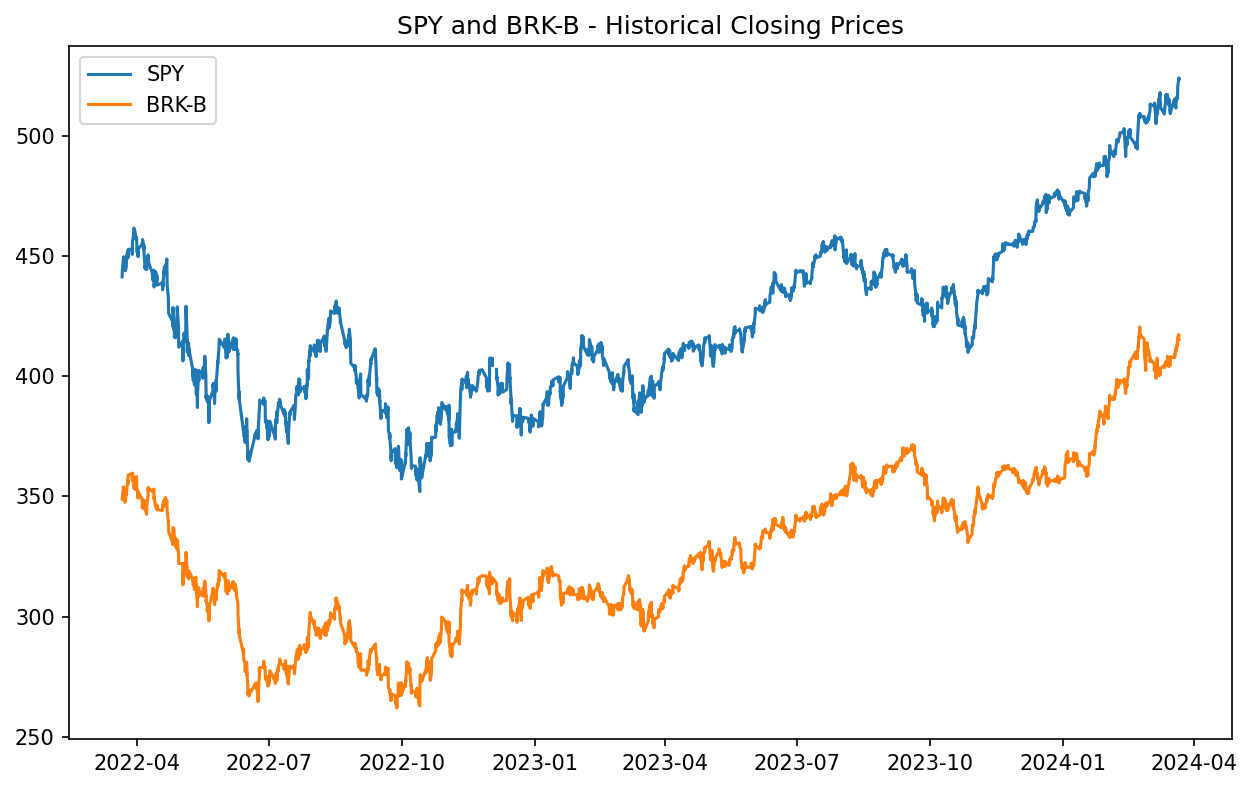

In [75]:
figure(figsize=(10, 6), dpi=150)
SPY = D['SPY'] #SPY is the S&P 500 ETF
BRK_B = D['BRK-B'] #BRK-B is the Berkshire Hathaway Inc. Class B
plt.plot(D['index'], SPY, label='SPY')
plt.plot(D['index'], BRK_B, label='BRK-B')
plt.title('SPY and BRK-B - Historical Closing Prices')
plt.legend()

Text(0.5, 1.0, 'BRK-B and MSFT - Historical Closing Prices')

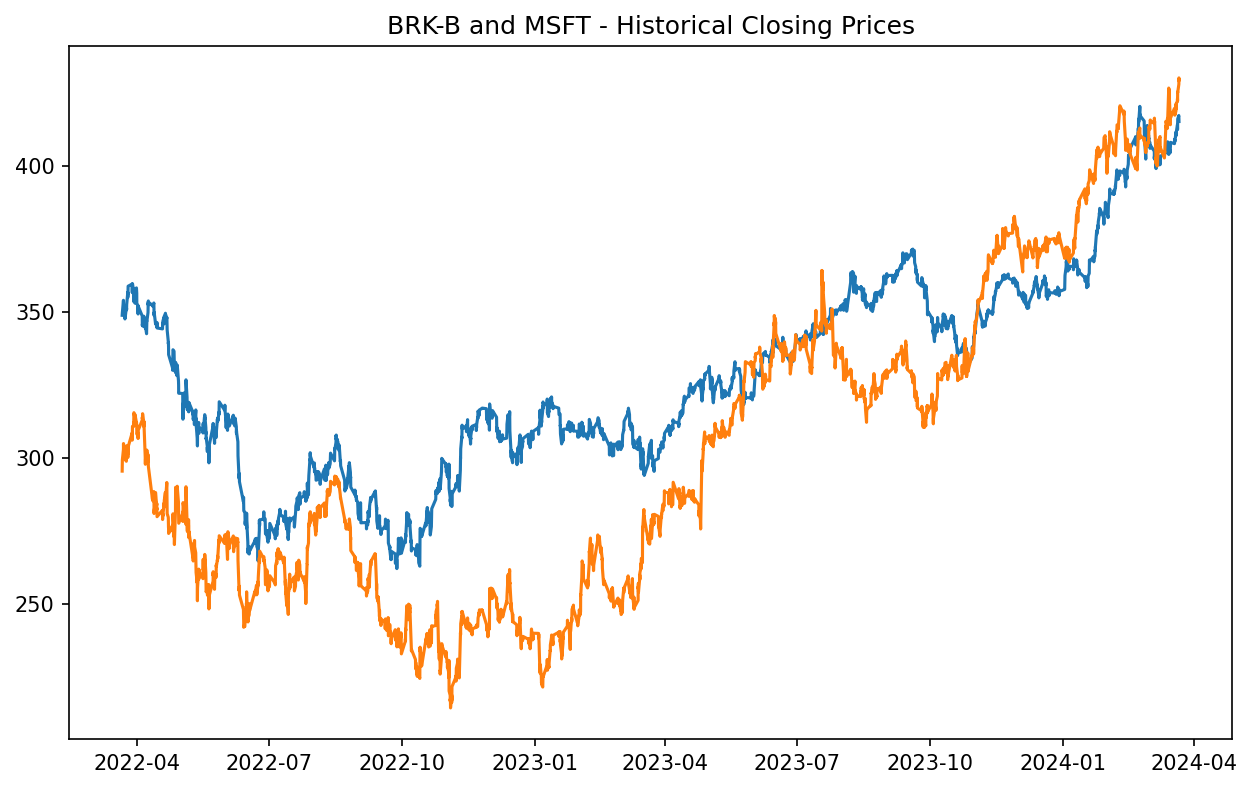

In [76]:
figure(figsize=(10, 6), dpi=150)
BRK_B = D['BRK-B'] #BRK-B is the Berkshire Hathaway Inc. Class B
MSFT = D['MSFT'] #MSFT is the Microsoft Corporation
plt.plot(D['index'], BRK_B, label='BRK-B')
plt.plot(D['index'], MSFT, label='MSFT')
plt.title('BRK-B and MSFT - Historical Closing Prices')

Text(0.5, 1.0, 'Spread (BRK_B - MSFT)')

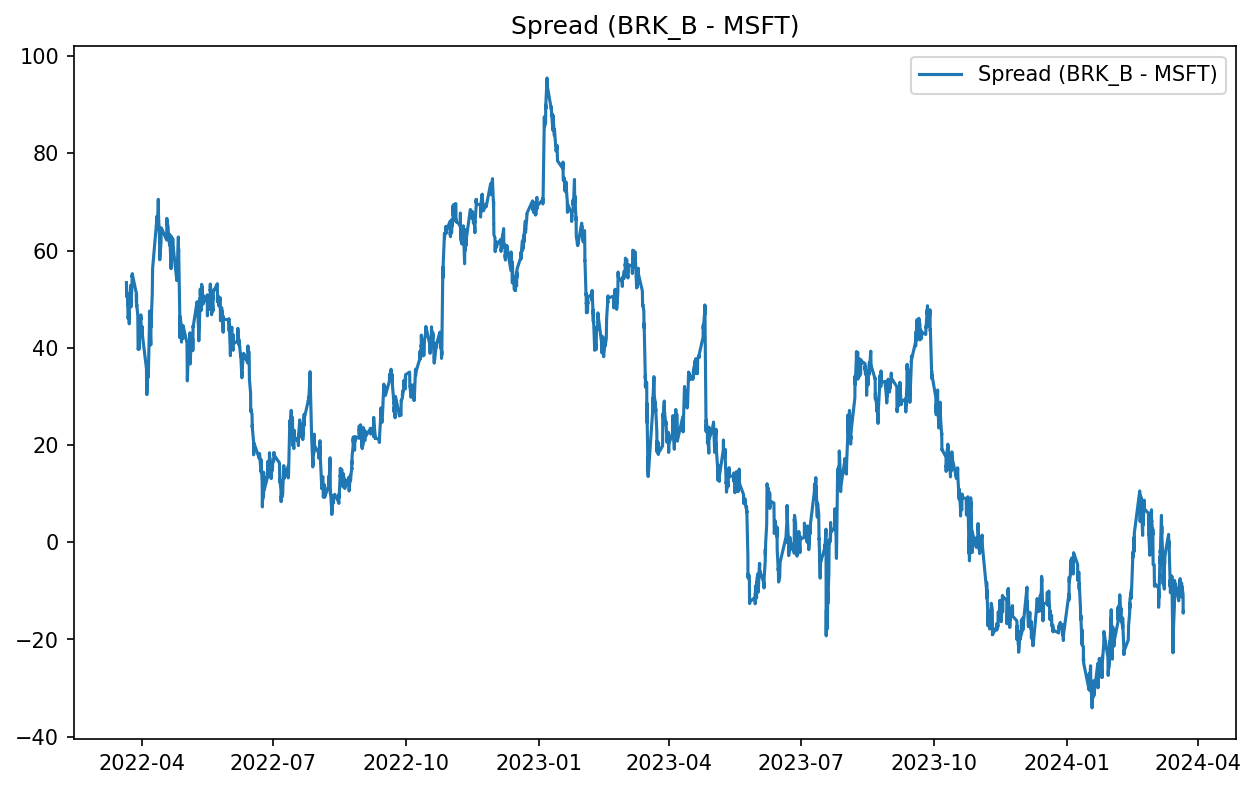

In [77]:
#plot the spread
figure(figsize=(10, 6), dpi=150)
plt.plot(D['index'], BRK_B - MSFT, label='Spread (BRK_B - MSFT)')
plt.legend()
plt.title('Spread (BRK_B - MSFT)')

In [52]:
# Check out the cointegration value: Null hyp. = no conintegration
import statsmodels.tsa.stattools as ts
result = ts.coint(BRK_B, MSFT) # cointegration test

In [53]:
cointegration_t_statistic = result[0]
p_value = result[1]
critical_values_test_statistic_at_1_5_10 = result[2]
print("We want the p-value to be less than 0.05, meaning that the cointegration exists.")
print("The p-value is", p_value)

We want the p-value to be less than 0.05, meaning that the cointegration exists.
The p-value is 0.18860777057368533


In [54]:
BRK_B_ADF = ts.adfuller(BRK_B)
print('P value for the Augemented Dickey Fuller test for BRK_B is', BRK_B_ADF[1])
MSTF_ADF = ts.adfuller(MSFT)
print('P value for the Augemented Dickey Fuller test for MSFT is', MSTF_ADF[1])
Spread_ADF = ts.adfuller(BRK_B - MSFT)
print('P value for the Augemented Dickey Fuller test for the Spread is', Spread_ADF[1])
Ratio_ADF = ts.adfuller(BRK_B / MSFT)
print('P value for the Augemented Dickey Fuller test for the Ratio is', Ratio_ADF[1])

P value for the Augemented Dickey Fuller test for BRK_B is 0.9637086541661671
P value for the Augemented Dickey Fuller test for MSFT is 0.9723631629297457
P value for the Augemented Dickey Fuller test for the Spread is 0.3820235172636486
P value for the Augemented Dickey Fuller test for the Ratio is 0.42240190918387965


Text(0.5, 1.0, 'Price Ratio between BRK and MSFT')

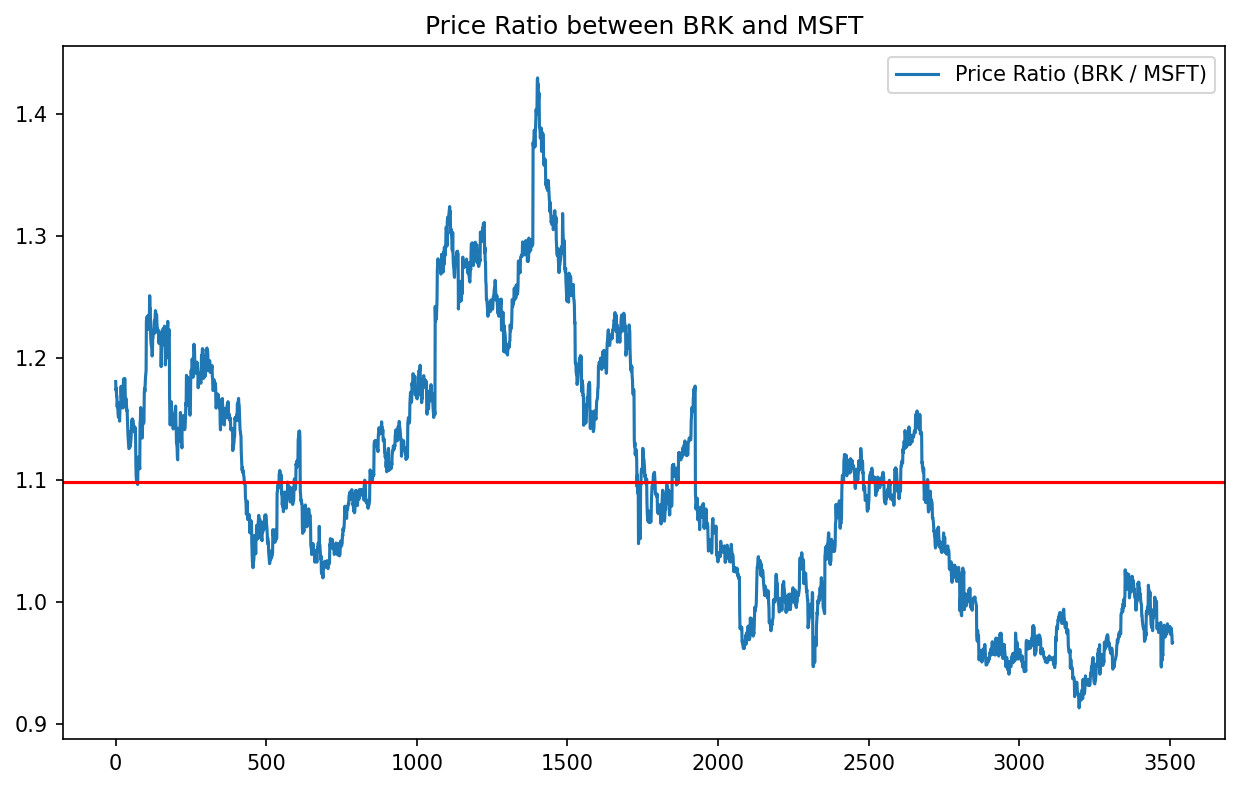

In [78]:
figure(figsize=(10,6), dpi=150)
ratio = BRK_B / MSFT
plt.plot(ratio, label = 'Price Ratio (BRK / MSFT)')
plt.axhline(ratio.mean(), color='red')
plt.legend()
plt.title("Price Ratio between BRK and MSFT")

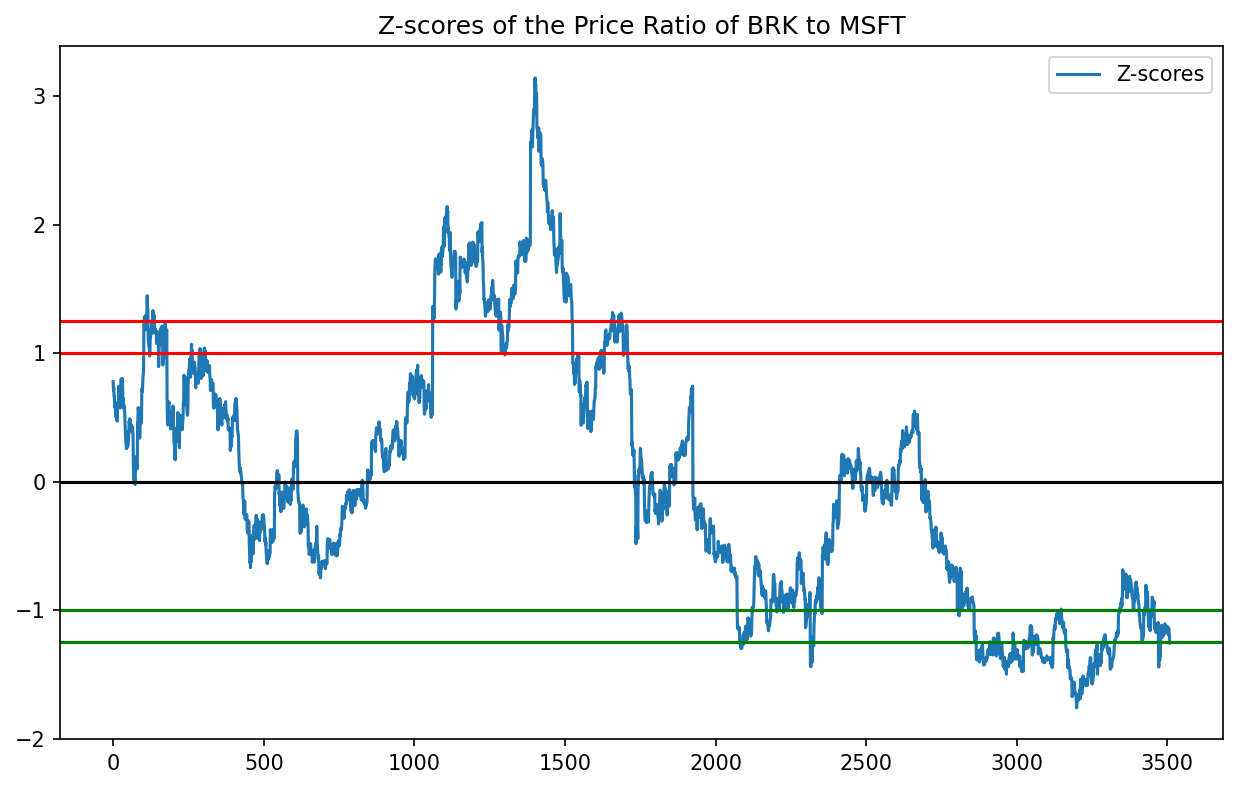

In [79]:
figure(figsize=(10,6), dpi=150)
# Calculate the Z scores of each row
df_zscore = (ratio - ratio.mean())/ratio.std()
plt.plot(df_zscore, label = 'Z-scores')
plt.axhline(df_zscore.mean(), color='black')
plt.axhline(1.0, color='red') # 
plt.axhline(1.25, color='red') # 95% of data will lie between these bounds
plt.axhline(-1.0, color='green') # 68% of data will lie between these bounds
plt.axhline(-1.25, color='green') # 95% of data will lie between these bounds
plt.legend()
plt.title("Z-scores of the Price Ratio of BRK to MSFT")
plt.show()

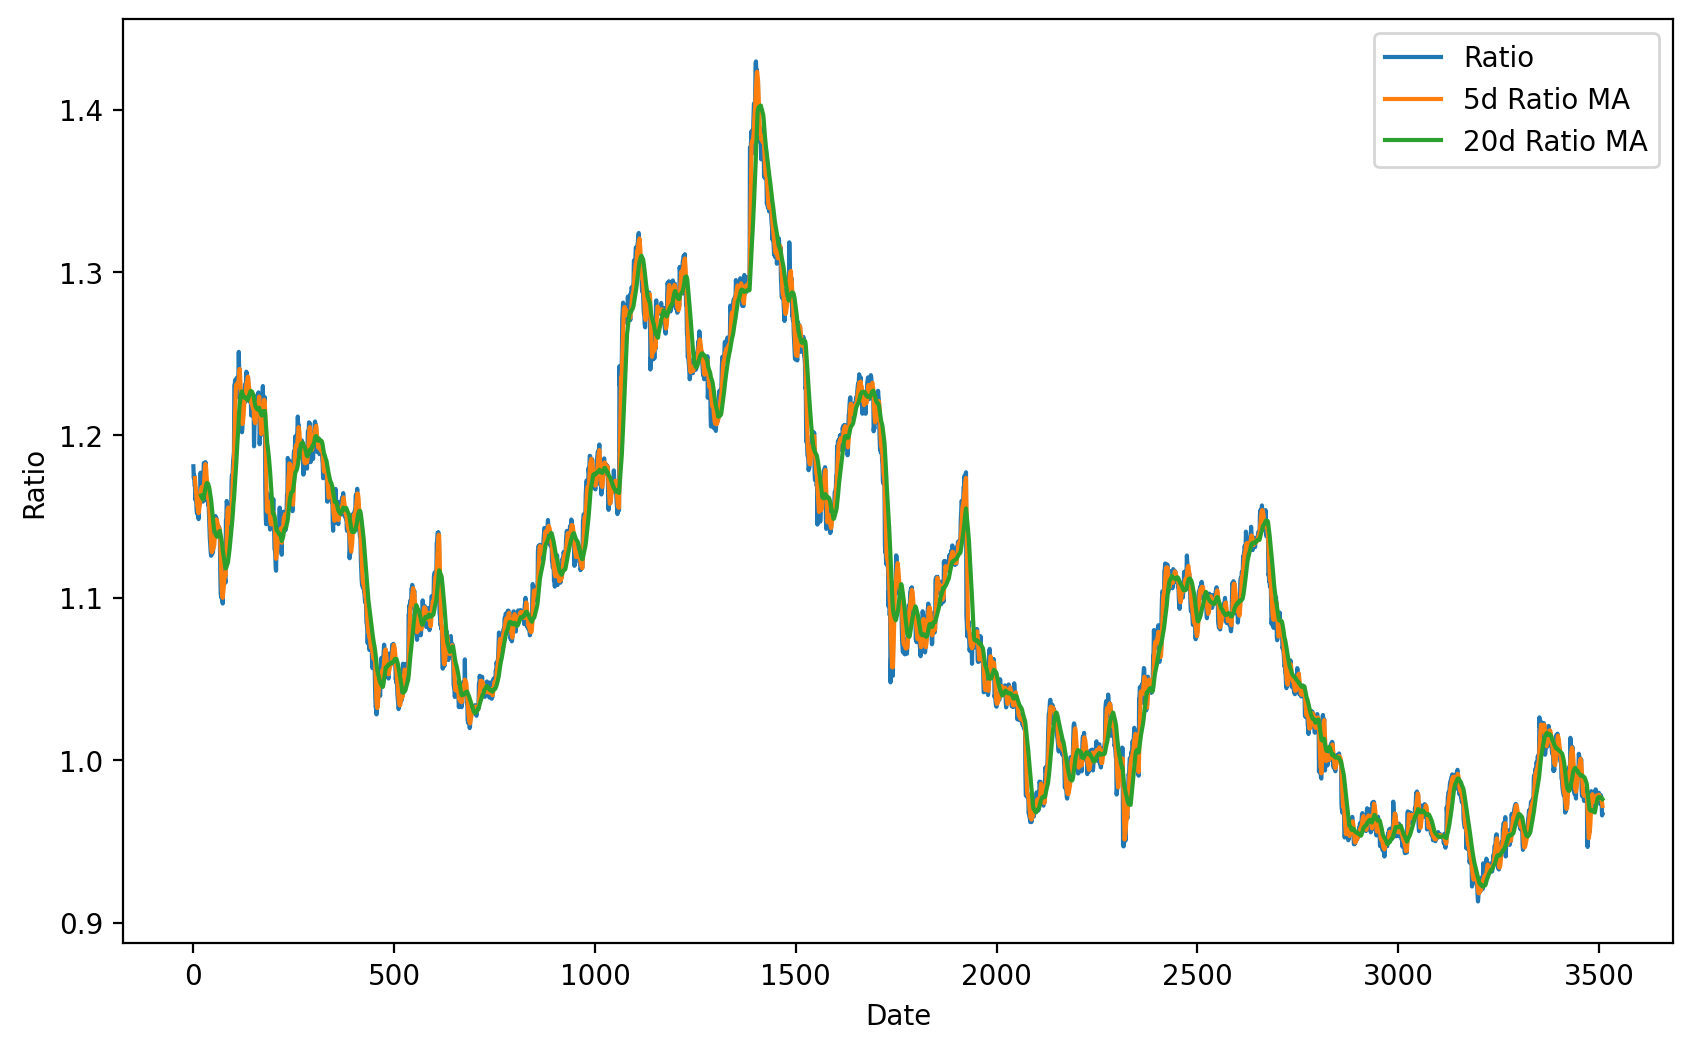

In [68]:
figure(figsize=(10,6), dpi=200)
ratio_mavg5 = ratio.rolling(window=5, center=False).mean() # ruído
ratio_mavg20 = ratio.rolling(window=20, center=False).mean() # ruído
ratio_mavg70 = ratio.rolling(window=70, center=False).mean() 
std_20 = ratio.rolling(window=20, center=False).std()
zscore_20_5 = (ratio_mavg5 - ratio_mavg20)/std_20
plt.plot(ratio.index, ratio.values)
plt.plot(ratio_mavg5.index, ratio_mavg5.values)
plt.plot(ratio_mavg20.index, ratio_mavg20.values)
plt.legend(['Ratio', '5d Ratio MA', '20d Ratio MA'])
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.show()

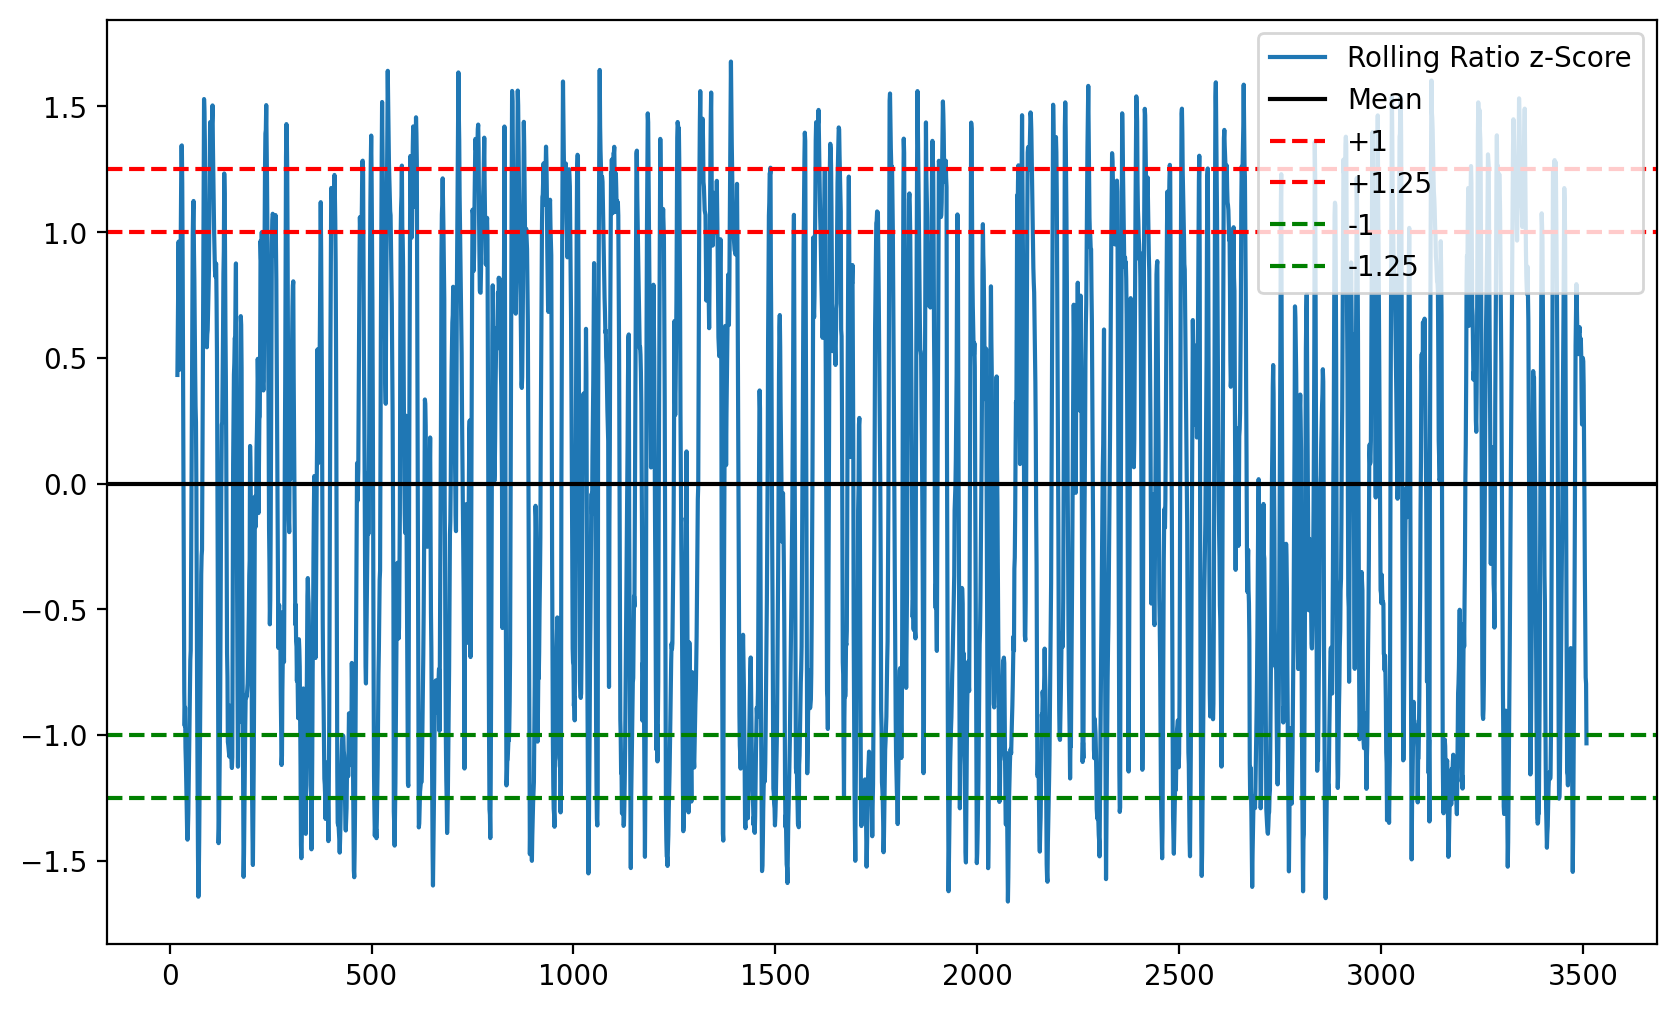

In [69]:
figure(figsize=(10,6), dpi=200)
zscore_20_5.plot()
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(1.25, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.axhline(-1.25, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '+1.25', '-1', '-1.25'])
plt.show()

In [1]:
figure(figsize=(8,6), dpi=200)
ratio.plot()
buy = ratio.copy()
sell = ratio.copy()
buy[zscore_20_5 > -1] = 0
sell[zscore_20_5 < 1] = 0
buy.plot(color='g', linestyle='None', marker='^', markersize=2.5)  # Adjust the markersize to make them smaller
sell.plot(color='r', linestyle='None', marker='v', markersize=2.5)  # Adjust the markersize to make them smaller
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio.min(), ratio.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.title("Relationship BRK to MSFT")
plt.show()

NameError: name 'figure' is not defined